In [ ]:
#connecting git hub to my vscode so that i could update easily and regularly form here only.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing

In [ ]:
df = pd.read_csv('cinema_hall_booking_data.csv')
df.head()
import os

,User_ID,Booking_ID,Name,Age,Gender,Location,Booking_Date,Movie_Name,Seat_Type,Snacks_Ordered,Total_Spending,Booking_Pattern
0,1,BKG001,User1,26.0,Female,City2,01-01-2025,Movie2,Economy,False,550,Weekday
1,2,BKG002,User2,26.5,Male,City3,02-01-2025,Movie3,Economy,False,220,Weekday
2,3,BKG003,User3,28.0,Female,City4,03-01-2025,Movie4,Regular,False,230,Weekday
3,4,BKG004,User4,29.0,Male,City5,04-01-2025,Movie5,Economy,True,207,Weekday
4,5,BKG005,User5,30.0,Female,City3,05-01-2025,Movie6,VIP,False,440,Weekend


In [177]:
df.sum().isnull()

User_ID            False
Booking_ID         False
Name               False
Age                False
Gender             False
Location           False
Booking_Date       False
Movie_Name         False
Seat_Type          False
Snacks_Ordered     False
Total_Spending     False
Booking_Pattern    False
dtype: bool

In [179]:
df.describe()

,User_ID,Age,Total_Spending
count,100.000000,100.000000,100.000000
mean,50.500000,29.377100,415.070000
std,29.011492,2.860656,143.031342
min,1.000000,23.000000,200.000000
25%,25.750000,27.000000,300.000000
50%,50.500000,29.100000,400.000000
75%,75.250000,32.000000,542.500000
max,100.000000,34.000000,690.000000


In [181]:
x = df[['Age','Total_Spending']]
x = np.array(x)
x

array([[ 26.  , 550.  ],
       [ 26.5 , 220.  ],
       [ 28.  , 230.  ],
       [ 29.  , 207.  ],
       [ 30.  , 440.  ],
       [ 31.  , 260.  ],
       [ 30.8 , 270.  ],
       [ 33.8 , 280.  ],
       [ 34.  , 330.  ],
       [ 26.  , 550.  ],
       [ 25.8 , 310.  ],
       [ 27.  , 600.  ],
       [ 28.9 , 330.  ],
       [ 29.  , 340.  ],
       [ 30.2 , 220.  ],
       [ 31.  , 360.  ],
       [ 32.  , 370.  ],
       [ 33.9 , 380.  ],
       [ 34.  , 390.  ],
       [ 26.  , 400.  ],
       [ 26.8 , 410.  ],
       [ 27.  , 420.  ],
       [ 28.  , 430.  ],
       [ 29.8 , 440.  ],
       [ 30.  , 450.  ],
       [ 29.  , 460.  ],
       [ 31.9 , 470.  ],
       [ 33.  , 480.  ],
       [ 34.  , 490.  ],
       [ 27.9 , 500.  ],
       [ 26.  , 510.  ],
       [ 30.  , 520.  ],
       [ 28.8 , 530.  ],
       [ 29.2 , 540.  ],
       [ 31.11, 550.  ],
       [ 24.4 , 560.  ],
       [ 32.  , 570.  ],
       [ 30.5 , 580.  ],
       [ 30.9 , 590.  ],
       [ 25.  , 600.  ],


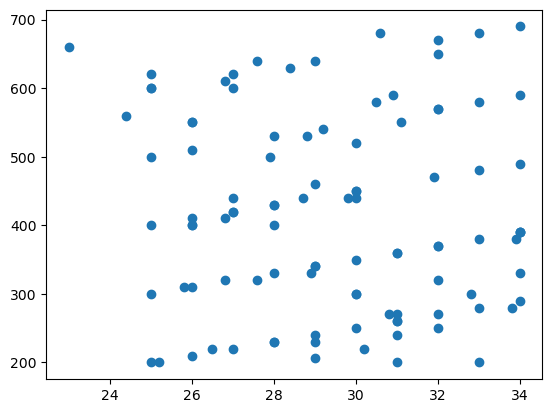

In [183]:
plt.scatter(x[:,0], x[:,1])

In [186]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [188]:
wcss

[2026148.661659,
 532330.2026853897,
 209465.40357640522,
 138752.61648679507,
 82293.83154249615,
 58780.55769595284,
 41040.342671642255,
 29821.87398766511,
 24784.82605527806,
 21375.16114829615]

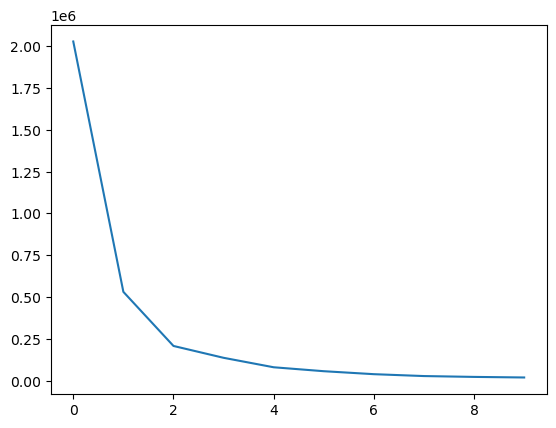

In [190]:
plt.plot(wcss)

In [192]:
kmeans = KMeans(n_clusters = 4, init = "k-means++")
kmeans.fit(x)

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [194]:
y = kmeans.fit_predict(x)
y

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 2, 3, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 1, 0, 3, 0, 3, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2])

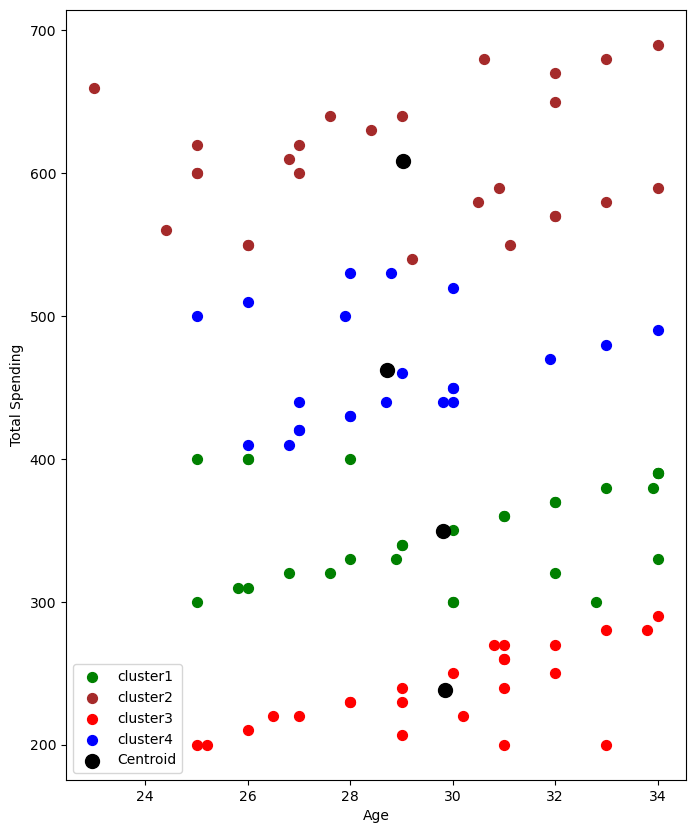

In [196]:
plt.figure(figsize = (8,10))
plt.scatter(x[y == 0,0], x[y == 0,1], s = 50, c = 'green', label = 'cluster1')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 50, c = 'brown', label = 'cluster2')
plt.scatter(x[y == 2,0], x[y == 2,1], s = 50, c = 'red', label = 'cluster3')
plt.scatter(x[y == 3,0], x[y == 3,1], s = 50, c = 'blue', label = 'cluster4')
plt.xlabel('Age')
plt.ylabel('Total Spending')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label = 'Centroid')
plt.legend()

In [198]:
x2 = df[['Age', 'Location']]

In [200]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x2['Location'] = label_encoder.fit_transform(x2['Location'])

C:\Users\kants\AppData\Local\Temp\ipykernel_20252\64105321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['Location'] = label_encoder.fit_transform(x2['Location'])


In [202]:
x2 = np.array(x2)
x2

array([[26.  ,  1.  ],
       [26.5 ,  2.  ],
       [28.  ,  3.  ],
       [29.  ,  4.  ],
       [30.  ,  2.  ],
       [31.  ,  1.  ],
       [30.8 ,  2.  ],
       [33.8 ,  3.  ],
       [34.  ,  0.  ],
       [26.  ,  2.  ],
       [25.8 ,  1.  ],
       [27.  ,  2.  ],
       [28.9 ,  3.  ],
       [29.  ,  4.  ],
       [30.2 ,  0.  ],
       [31.  ,  1.  ],
       [32.  ,  2.  ],
       [33.9 ,  3.  ],
       [34.  ,  2.  ],
       [26.  ,  0.  ],
       [26.8 ,  1.  ],
       [27.  ,  2.  ],
       [28.  ,  3.  ],
       [29.8 ,  4.  ],
       [30.  ,  0.  ],
       [29.  ,  1.  ],
       [31.9 ,  2.  ],
       [33.  ,  3.  ],
       [34.  ,  4.  ],
       [27.9 ,  0.  ],
       [26.  ,  1.  ],
       [30.  ,  2.  ],
       [28.8 ,  3.  ],
       [29.2 ,  3.  ],
       [31.11,  0.  ],
       [24.4 ,  1.  ],
       [32.  ,  2.  ],
       [30.5 ,  3.  ],
       [30.9 ,  4.  ],
       [25.  ,  0.  ],
       [26.8 ,  1.  ],
       [25.  ,  2.  ],
       [28.4 ,  3.  ],
       [27.

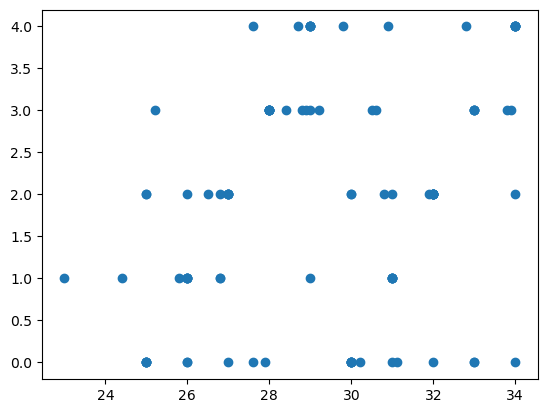

In [204]:
plt.scatter(x2[:,0],x2[:,1])

In [206]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [208]:
wcss

[1002.3416589999998,
 419.3126316666666,
 261.82130997749437,
 241.75782913933608,
 124.42121482536989,
 116.23978564213562,
 82.6420497835498,
 75.73890871117186,
 67.46893129204129,
 56.462421624209114]

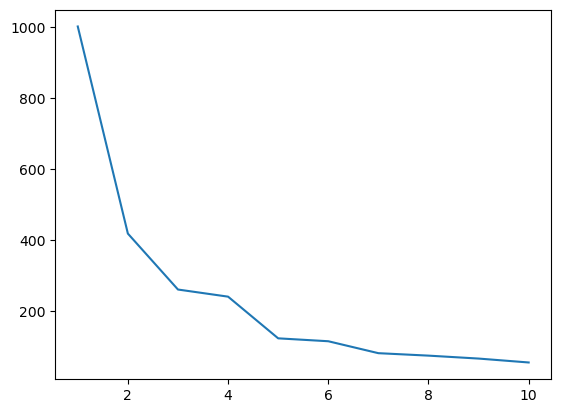

In [210]:
plt.plot(range(1,11), wcss)

In [212]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")
kmeans.fit(x2)

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

In [214]:
y2 = kmeans.fit_predict(x)
y2

C:\Users\kants\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 6, 6, 6, 0, 1, 1, 1, 3, 4, 3, 4, 3, 3, 6, 3, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 3,
       5, 5, 5, 5, 5, 5, 5, 0, 0, 6, 1, 4, 5, 0, 3, 0, 5, 6, 3, 1, 4, 6,
       4, 4, 5, 2, 3, 2, 3, 1, 3, 2, 3, 6])

Text(0, 0.5, 'Location')

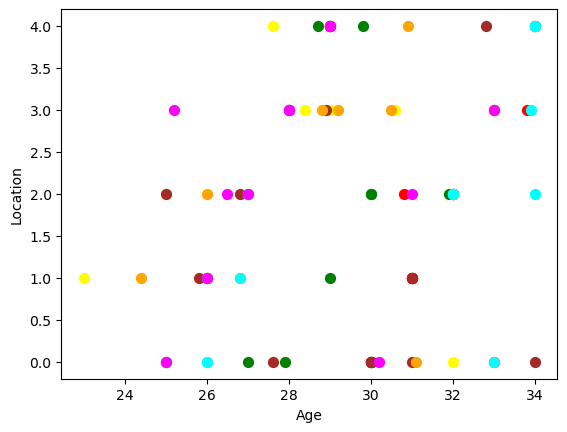

In [216]:
plt.scatter(x2[y2 == 0,0], x2[y2 == 0,1], s = 50, c = 'green', label = 'cluster1')
plt.scatter(x2[y2 == 1,0], x2[y2 == 1,1], s = 50, c = 'red', label = 'cluster2')
plt.scatter(x2[y2 == 2,0], x2[y2 == 2,1], s = 50, c = 'yellow', label = 'cluster3')
plt.scatter(x2[y2 == 3,0], x2[y2 == 3,1], s = 50, c = 'brown', label = 'cluster4')
plt.scatter(x2[y2 == 4,0], x2[y2 == 4,1], s = 50, c = 'orange', label = 'cluster5')
plt.scatter(x2[y2 == 5,0], x2[y2 == 5,1], s = 50, c = 'cyan', label = 'cluster6')
plt.scatter(x2[y2 == 6,0], x2[y2 == 6,1], s = 50, c = 'magenta', label = 'cluster7')
plt.xlabel('Age')
plt.ylabel('Location')